In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from scipy import stats
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
#Cleaning the data
csv_path = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(csv_path)
df.replace("Unknown", np.nan, inplace = True)
df["SPEEDING"].replace(np.nan, "N", inplace = True)
df.dropna(subset = ["X", "Y"], axis = 0, inplace = True)
df.dropna(subset = ["WEATHER", "ROADCOND"], axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
effects = df.copy(deep = True)

df.shape

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(169126, 38)

In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,N,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,N,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,N,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,N,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,N,10,Entering at angle,0,0,N


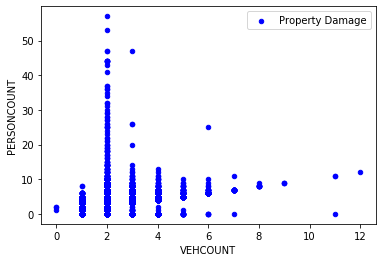

In [4]:
ax = df[df["SEVERITYCODE"] == 1].plot(kind = "scatter", x = "VEHCOUNT", y = "PERSONCOUNT", color = "Blue", label = "Property Damage")
plt.show()

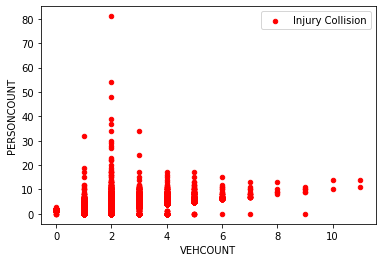

In [5]:

ax = df[df["SEVERITYCODE"] == 2].plot(kind = "scatter", x = "VEHCOUNT", y = "PERSONCOUNT", color = "Red", label = "Injury Collision")
plt.show()

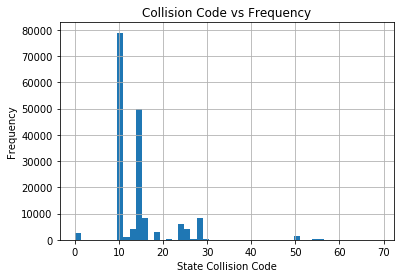

In [6]:

df.hist(column='SDOT_COLCODE', bins=50)
plt.title("Collision Code vs Frequency")
plt.xlabel("State Collision Code")
plt.ylabel("Frequency")
plt.show()

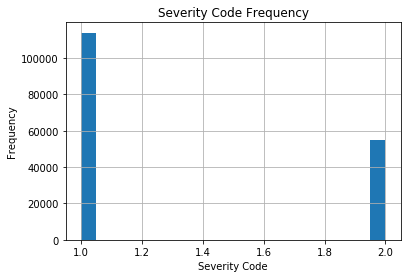

In [7]:

df.hist(column='SEVERITYCODE', bins=20)
plt.title("Severity Code Frequency")
plt.xlabel("Severity Code")
plt.ylabel("Frequency")
plt.show()

In [8]:

X= df[["VEHCOUNT", "PERSONCOUNT", "SDOT_COLCODE", "SEGLANEKEY"]].values
y = df["SEVERITYCODE"].values
print("Actual values of the test cases: " + str(y[0:20]))

Actual values of the test cases: [2 1 1 1 2 1 1 2 1 2 1 1 1 2 2 2 2 2 1 2]


In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
scores = {}

In [10]:
#Decision Tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)
y_hat = clf_tree.predict(X_train)
scores["Tree-f1-score"] = f1_score(y_train, y_hat, average = "weighted")
scores["Tree-jaccard"] = jaccard_score(y_train, y_hat)
print("Using a decision tree, we get the predicted values to be: " + str(y_hat[0:20]))
scores

Using a decision tree, we get the predicted values to be: [2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1]


{'Tree-f1-score': 0.6902247634772901, 'Tree-jaccard': 0.7139185672490989}

In [11]:
clff_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
clff_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
clff_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
predtree = clff_tree.predict(X_test)

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
print ('Decision tree accuracy :', metrics.accuracy_score(y_test, predtree))

Decision tree accuracy : 0.7266008395908473


In [15]:
features = df[["VEHCOUNT", "PERSONCOUNT", "SDOT_COLCODE", "SEGLANEKEY"]]

In [16]:
featureNames = features.columns[0:5]
featureNames

Index(['VEHCOUNT', 'PERSONCOUNT', 'SDOT_COLCODE', 'SEGLANEKEY'], dtype='object')

In [17]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


dot_data = StringIO()

filename = 'clfftree.png'
featureNames = features.columns[0:5]
targetNames = df["SEVERITYCODE"].unique().tolist()
out = tree.export_graphviz(clff_tree, feature_names =featureNames, out_file = dot_data, class_names = np.unique(y_train), filled = True, special_characters = True, rotate = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalues())
graph.write_png(filename)
img = mping.imread(filename)
plt.figure(figsize =(100, 200))
plt.imshow(img, interpolation = 'nearest')

dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                     feature_names=["VEHCOUNT", "PERSONCOUNT", "SDOT_COLCODE", "SEGLANEKEY"],  
                     class_names='SEVERITYCODE',  
                     filled=True, rounded=True,  
                     special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"20, 20!"')
gvz_graph = graphviz.Source(graph.to_string())

gvz_graph

Test set Accuracy at k= 1 :  0.30121733966745845
Test set Accuracy at k= 2 :  0.5406360424028268
Test set Accuracy at k= 3 :  0.5316246382802811
Test set Accuracy at k= 4 :  0.5752497371188223
Test set Accuracy at k= 5 :  0.5901874914465581
Test set Accuracy at k= 6 :  0.5876661840200079
Test set Accuracy at k= 7 :  0.5934058393659725
Test set Accuracy at k= 8 :  0.69045830202855
Test set Accuracy at k= 9 :  0.6993428081193953


Text(0, 0.5, 'Testing Accuracy')

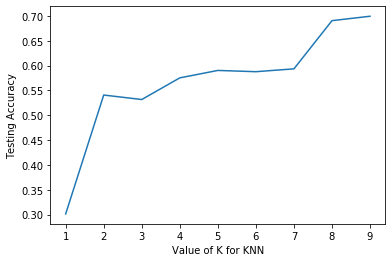

In [19]:

k_range = range(1, 10)
accuracy_score = []
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    # perform the test
    knn_yhat = KNN.predict(X_test)
    print("Test set Accuracy at k=", k, ": ", jaccard_score(y_test, knn_yhat))
    accuracy_score.append(jaccard_score(y_test, knn_yhat))

# plot the relationship between K and testing accuracy
plt.plot(k_range, accuracy_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [20]:

k = 9
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
y_hat = KNN.predict(X)
print("Predicted values using k = 9: " + str(y_hat[0:20]))

Predicted values using k = 9: [1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1]


In [21]:

print("KNN F1-Score: " + str(f1_score(y, y_hat, average = "weighted")))
print("KNN Jaccard Score: " + str(jaccard_score(y, y_hat)))

KNN F1-Score: 0.601255208417448
KNN Jaccard Score: 0.6717197413185398
